In [9]:
import chaospy as cp
import a_comparison as acn
import calculation_plot as calp
import sampling_method as sm
import numpy as np
%matplotlib inline

In [10]:
k = [10, 20, 30, 50]
N = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
#N = [16, 32, 64, 128, 256]
leng = len(N)
R = 50
NN = int(leng*R)
#define variations of the test function

In [11]:
kk = k[0]
a1 = sm.create_coefficient_a(kk, "A1-1")
a2 = sm.create_coefficient_a(kk, "A1-2")
a3 = sm.create_coefficient_a(kk, "A2")
a4 = sm.create_coefficient_a(kk, "B")
a5 = sm.create_coefficient_a(kk)

In [12]:
a = a1
#chaospy Sobol
rule1 = "S"
#chaospy Latin Hypercube
rule2 = "L"

rule3 = "R"

#er_si_N_1 = np.zeros((NN, kk))
#er_sti_N_1 = np.zeros((NN, kk))
#er_si_N_2 = np.zeros((NN, kk))
#er_sti_N_2 = np.zeros((NN, kk))
er_si_N_1, er_sti_N_1 = calp.n_calculate(kk, N, a, R, rule1)
er_si_N_2, er_sti_N_2 = calp.n_calculate(kk, N, a, R, rule2)
er_si_N_3, er_sti_N_3 = calp.n_calculate(kk, N, a, R, rule3)

In [13]:
er_si_max_1 = er_si_N_1[(NN-R):NN, :]
er_si_max_2 = er_si_N_2[(NN-R):NN, :]
er_si_max_3 = er_si_N_3[(NN-R):NN, :]
er_sti_max_1 = er_sti_N_1[(NN-R):NN, :]
er_sti_max_2 = er_sti_N_2[(NN-R):NN, :]
er_sti_max_3 = er_sti_N_3[(NN-R):NN, :]

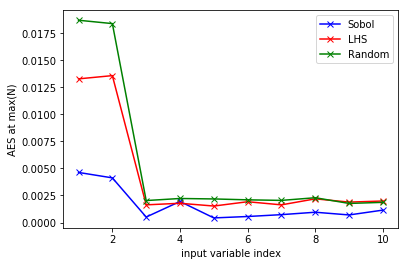

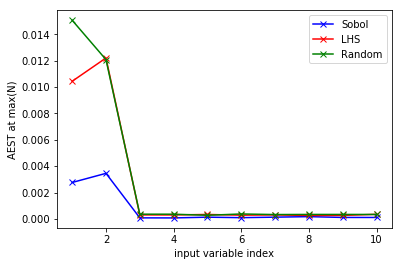

In [14]:
calp.draw_aes_plot(kk, a, R, er_si_max_1, er_si_max_2, er_si_max_3, er_sti_max_1, er_sti_max_2, er_sti_max_3)

In [15]:
aes_1_N, aest_1_N = calp.aes_aest_N(N, kk, R, a, er_si_N_1, er_sti_N_1)
aes_2_N, aest_2_N = calp.aes_aest_N(N, kk, R, a, er_si_N_2, er_sti_N_2)
aes_3_N, aest_3_N = calp.aes_aest_N(N, kk, R, a, er_si_N_3, er_sti_N_3)
maes_1, maest_1 = calp.maes_maest_N(N, kk, aes_1_N, aest_1_N)
maes_2, maest_2 = calp.maes_maest_N(N, kk, aes_2_N, aest_2_N)
maes_3, maest_3 = calp.maes_maest_N(N, kk, aes_3_N, aest_3_N)

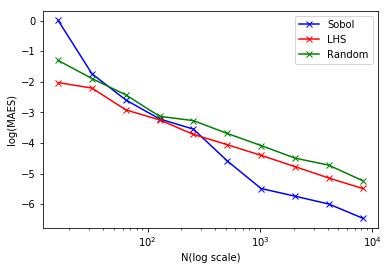

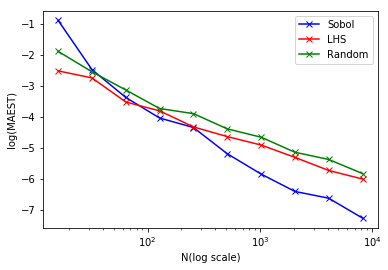

In [16]:
calp.draw_maes_plot(N, maes_1, maes_2, maes_3, maest_1, maest_2, maest_3)